# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O ema_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/ema_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' ema_crossover_us.py

In [5]:
from ema_crossover_us import StrategyEMARegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 135025,
 'strategyId': '8d993d4af77f4f3ea35ab22911a9a550'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIMEPERIOD1': 12,
  'TIMEPERIOD2': 20,
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'EMA Regular Order Strategy US' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Vendor Name             │ ALPACAV2                               │
├─────────────────────────┼────────────────────────────────────────┤
│ Strategy Name           │ EMA Regular Order Strategy US          │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:MSFT']                        │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp        

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [16]:
print(logs)

[2023-10-23 17:08:38] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-23 17:08:38] Sanity checks on cfg successful.
[2023-10-23 17:08:38] Currency set to "USD"
[2023-10-23 17:08:38] Setting up broker connection...
[2023-10-23 17:08:40] Starting ALPACAV2 in PAPER mode...
[2023-10-23 17:08:41] Broker connection has been setup successfully.
[2023-10-23 17:08:41] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-10-23 17:08:41] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-23 17:08:41] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-23 17:08:41] Reading strategy...
[2023-10-23 17:08:41] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0              NASDAQ                     MSFT 2021-08-04 10:30:00-04:00   
1              NASDAQ                     MSFT 2021-08-10 11:30:00-04:00   
2              NASDAQ                     MSFT 2021-08-12 12:30:00-04:00   
3              NASDAQ                     MSFT 2021-08-12 13:30:00-04:00   
4              NASDAQ                     MSFT 2021-08-12 14:30:00-04:00   
5              NASDAQ                     MSFT 2021-08-19 12:30:00-04:00   
6              NASDAQ                     MSFT 2021-08-19 13:30:00-04:00   
7              NASDAQ                     MSFT 2021-08-19 14:30:00-04:00   
8              NASDAQ                     MSFT 2021-08-26 10:30:00-04:00   
9              NASDAQ                     MSFT 2021-08-30 10:30:00-04:00   
10             NASDAQ                     MSFT 2021-09-02 11:30:00-04:00   
11             NASDAQ                     MSFT 2021-09-14 11:30:00-04:00   
12             NASDAQ                     MSFT 2021-09-24 12:30:00-04:00   
13             NASDAQ                     MSFT 2021-09-24 13:30:00-04:00   
14             NASDAQ                     MSFT 2021-09-24 14:30:00-04:00   
15             NASDAQ                     MSFT 2021-10-05 12:30:00-04:00   
16             NASDAQ                     MSFT 2021-10-05 13:30:00-04:00   
17             NASDAQ                     MSFT 2021-10-05 14:30:00-04:00   
18             NASDAQ                     MSFT 2021-11-10 10:30:00-04:00   
19             NASDAQ                     MSFT 2021-11-23 09:30:00-04:00   
20             NASDAQ                     MSFT 2021-12-01 10:30:00-04:00   
21             NASDAQ                     MSFT 2021-12-07 10:30:00-04:00   
22             NASDAQ                     MSFT 2021-12-14 11:30:00-04:00   
23             NASDAQ                     MSFT 2021-12-22 09:30:00-04:00   
24             NASDAQ                     MSFT 2021-12-31 11:30:00-04:00   
25             NASDAQ                     MSFT 2022-01-12 10:30:00-04:00   
26             NASDAQ                     MSFT 2022-01-20 12:30:00-04:00   
27             NASDAQ                     MSFT 2022-01-20 13:30:00-04:00   
28             NASDAQ                     MSFT 2022-01-20 14:30:00-04:00   
29             NASDAQ                     MSFT 2022-01-26 10:30:00-04:00   
30             NASDAQ                     MSFT 2022-02-25 09:30:00-04:00   
31             NASDAQ                     MSFT 2022-03-04 09:30:00-04:00   
32             NASDAQ                     MSFT 2022-04-01 10:30:00-04:00   
33             NASDAQ                     MSFT 2022-04-04 11:30:00-04:00   
34             NASDAQ                     MSFT 2022-04-27 10:30:00-04:00   
35             NASDAQ                     MSFT 2022-05-05 11:30:00-04:00   
36             NASDAQ                     MSFT 2022-05-18 11:30:00-04:00   
37             NASDAQ                     MSFT 2022-05-24 10:30:00-04:00   
38             NASDAQ                     MSFT 2022-06-02 12:30:00-04:00   
39             NASDAQ                     MSFT 2022-06-02 13:30:00-04:00   
40             NASDAQ                     MSFT 2022-06-02 14:30:00-04:00   
41             NASDAQ                     MSFT 2022-06-09 09:30:00-04:00   
42             NASDAQ                     MSFT 2022-06-09 10:30:00-04:00   
43             NASDAQ                     MSFT 2022-07-12 10:30:00-04:00   
44             NASDAQ                     MSFT 2022-07-15 12:30:00-04:00   
45             NASDAQ                     MSFT 2022-07-15 13:30:00-04:00   
46             NASDAQ                     MSFT 2022-07-15 14:30:00-04:00   
47             NASDAQ                     MSFT 2022-07-25 11:30:00-04:00   
48             NASDAQ                     MSFT 2022-07-27 10:30:00-04:00   
49             NASDAQ                     MSFT 2022-08-09 09:30:00-04:00   
50             NASDAQ                     MSFT 2022-09-13 11:30:00-04:00   
51             NASDAQ                     MSFT 2022

## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-04
End Period          2023-07-12
Risk-Free Rate      0.0%
Time in Market      53.0%

Cumulative Return   2.9%
CAGR﹪              1.49%

Sharpe              2.13
Prob. Sharpe Ratio  90.34%
Sortino             3.46
Sortino/√2          2.45
Omega               1.69

Max Drawdown        -1.22%
Longest DD Days     282

Gain/Pain Ratio     0.69
Gain/Pain (1M)      0.99

Payoff Ratio        1.39
Profit Factor       1.69
Common Sense Ratio  3.17
CPC Index           1.29
Tail Ratio          1.88
Outlier Win Ratio   5.49
Outlier Loss Ratio  3.11

MTD                 -0.49%
3M                  0.06%
6M                  1.7%
YTD                 1.7%
1Y                  1.45%
3Y (ann.)           1.49%
5Y (ann.)           1.49%
10Y (ann.)          1.49%
All-time (ann.)     1.49%

Avg. Drawdown       -0.41%
Avg. Drawdown Days  56
Recovery Factor     2.38
Ulcer Index         0.01
Serenity Index      0.86


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-04
End Period                 2023-07-12
Risk-Free Rate             0.0%
Time in Market             53.0%

Cumulative Return          2.9%
CAGR﹪                     1.49%

Sharpe                     2.13
Prob. Sharpe Ratio         90.34%
Smart Sharpe               1.8
Sortino                    3.46
Smart Sortino              2.92
Sortino/√2                 2.45
Smart Sortino/√2           2.06
Omega                      1.69

Max Drawdown               -1.22%
Longest DD Days            282
Volatility (ann.)          3.51%
Calmar                     1.22
Skew                       -0.06
Kurtosis                   4.97

Expected Daily %           0.03%
Expected Monthly %         0.12%
Expected Yearly %          0.96%
Kelly Criterion            22.42%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive Wins       6
Ma

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-05-24  2022-12-12  2023-03-03   282     -1.218021         -1.214352
2  2022-01-12  2022-02-25  2022-04-27   105     -1.194872         -1.014537
3  2023-05-15  2023-06-01  2023-06-07    22     -0.571019         -0.257566
4  2023-07-12  2023-07-12  2023-07-12     0     -0.489371               NaN
5  2021-08-10  2021-08-30  2021-09-14    35     -0.085179         -0.050105

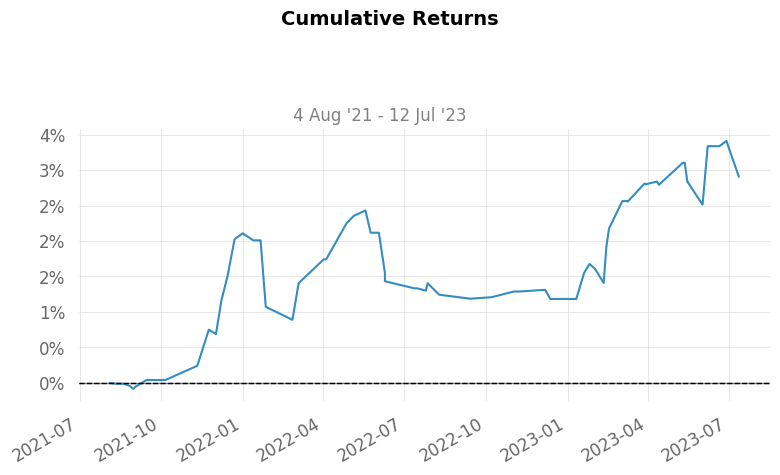

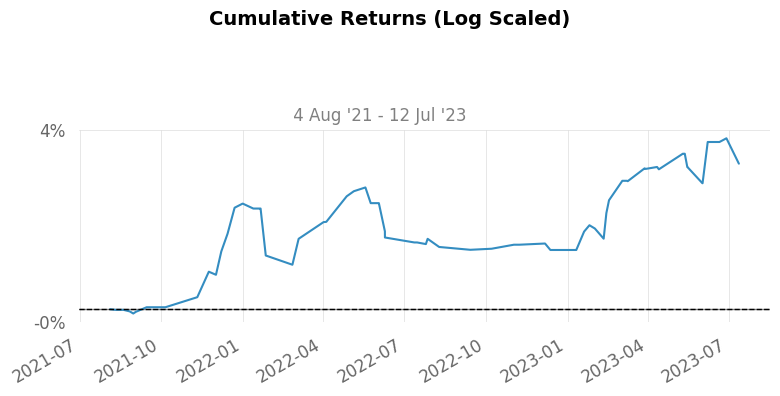

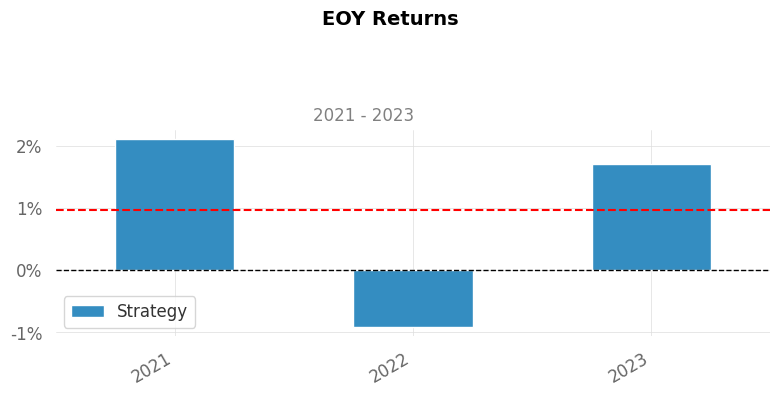

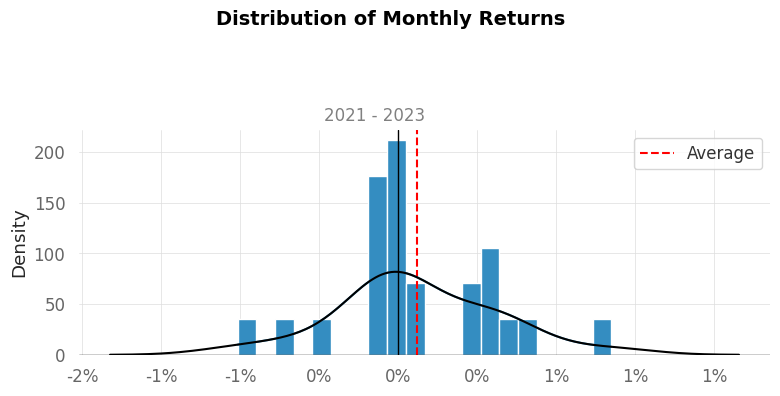

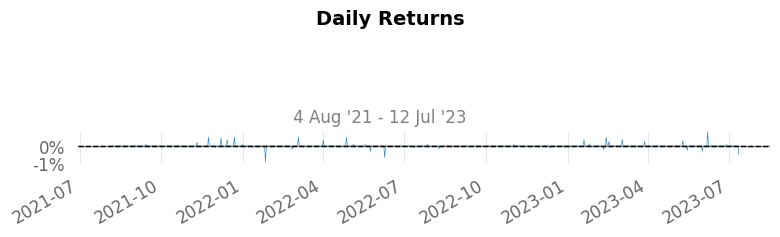

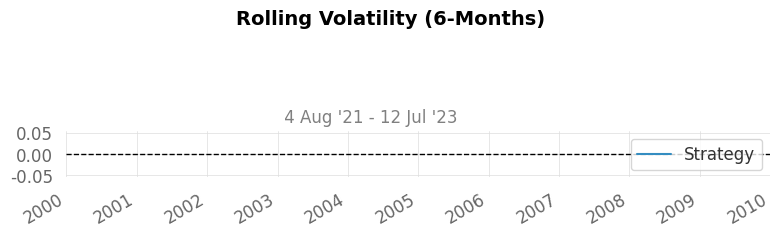

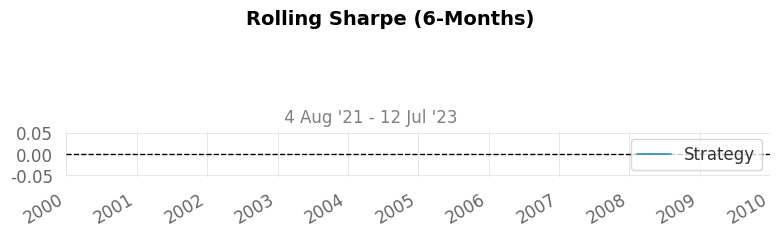

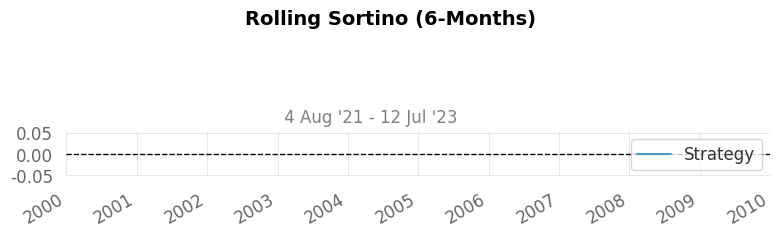

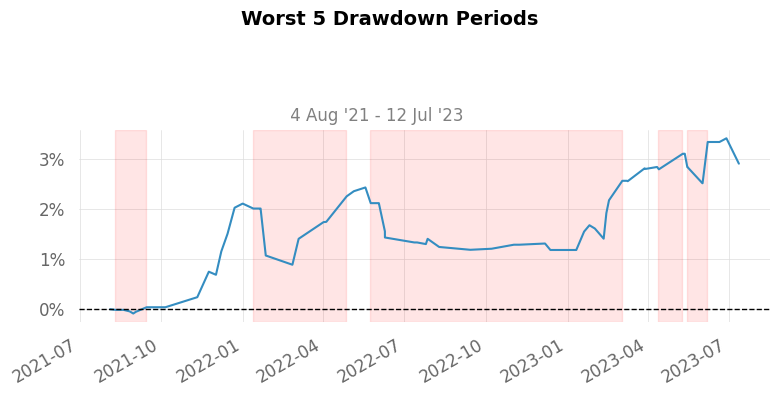

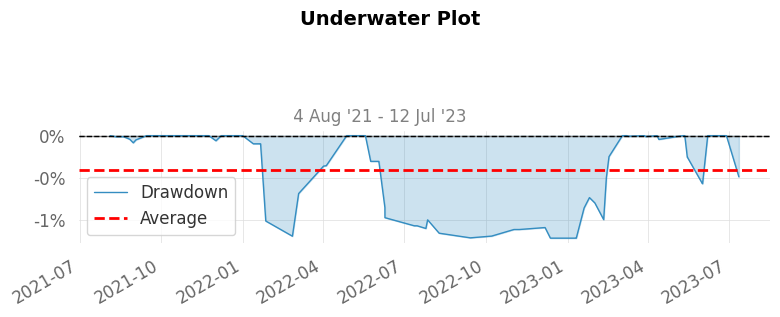

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


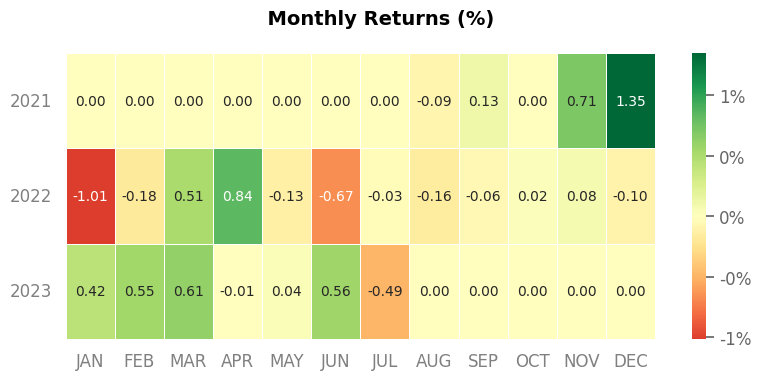

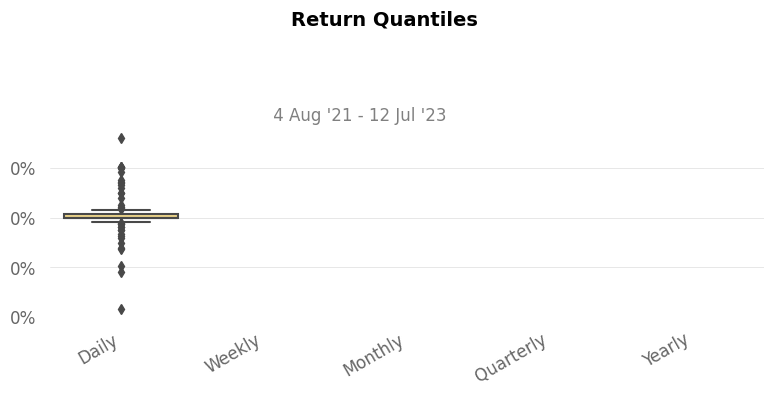

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 105ae737e5704c11a3ff51ad55d4ac83 |
| Transaction Type | SELL                             |
| Instrument       | NASDAQ:MSFT                      |
| Quantity         | 5                                |
| Price            | $336.43                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T11:48:55.509735Z | COMPLETE               |
| 2023-10-23T11:48:55.509720Z | OPEN                   |
| 2023-10-23T11:48:55.509704Z | OPEN PENDING           |
| 2023-10-23T11:48:55.509686Z | VALIDATION PENDING     |
| 2023-10-23T11:48:55.509645Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 53f990a29be74b2e8

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)